              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   
8  Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
9            Plot  Area  Ready To Move              Gandhi Bazar  6 Bedroom   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0

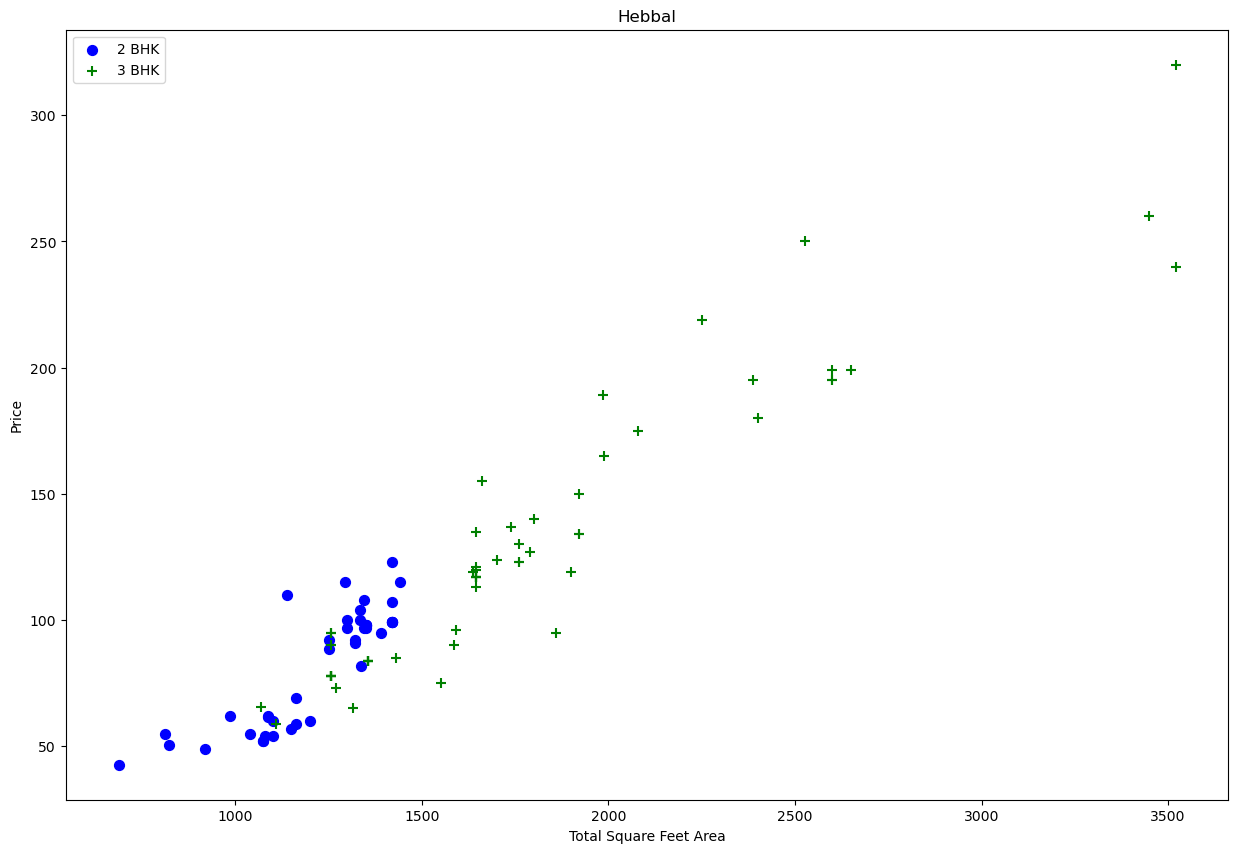

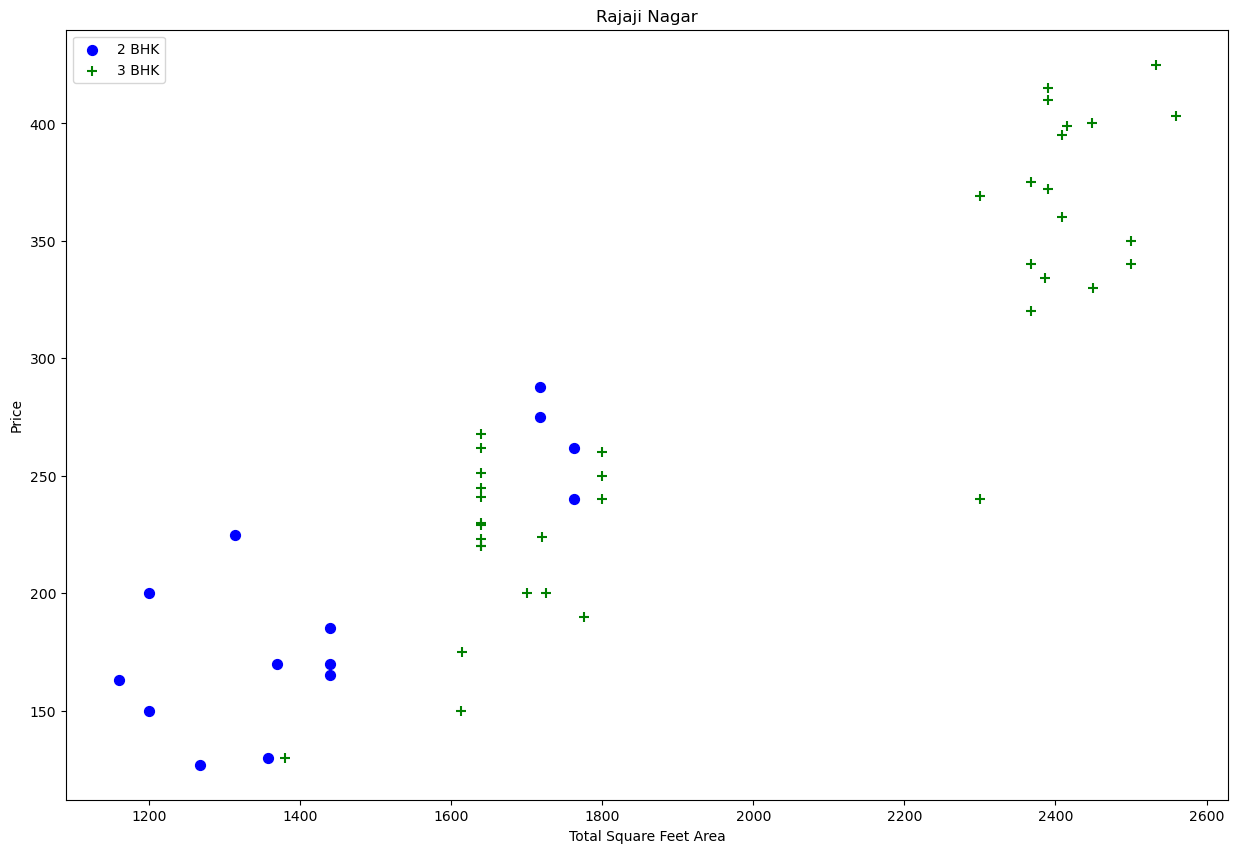

(7329, 7)


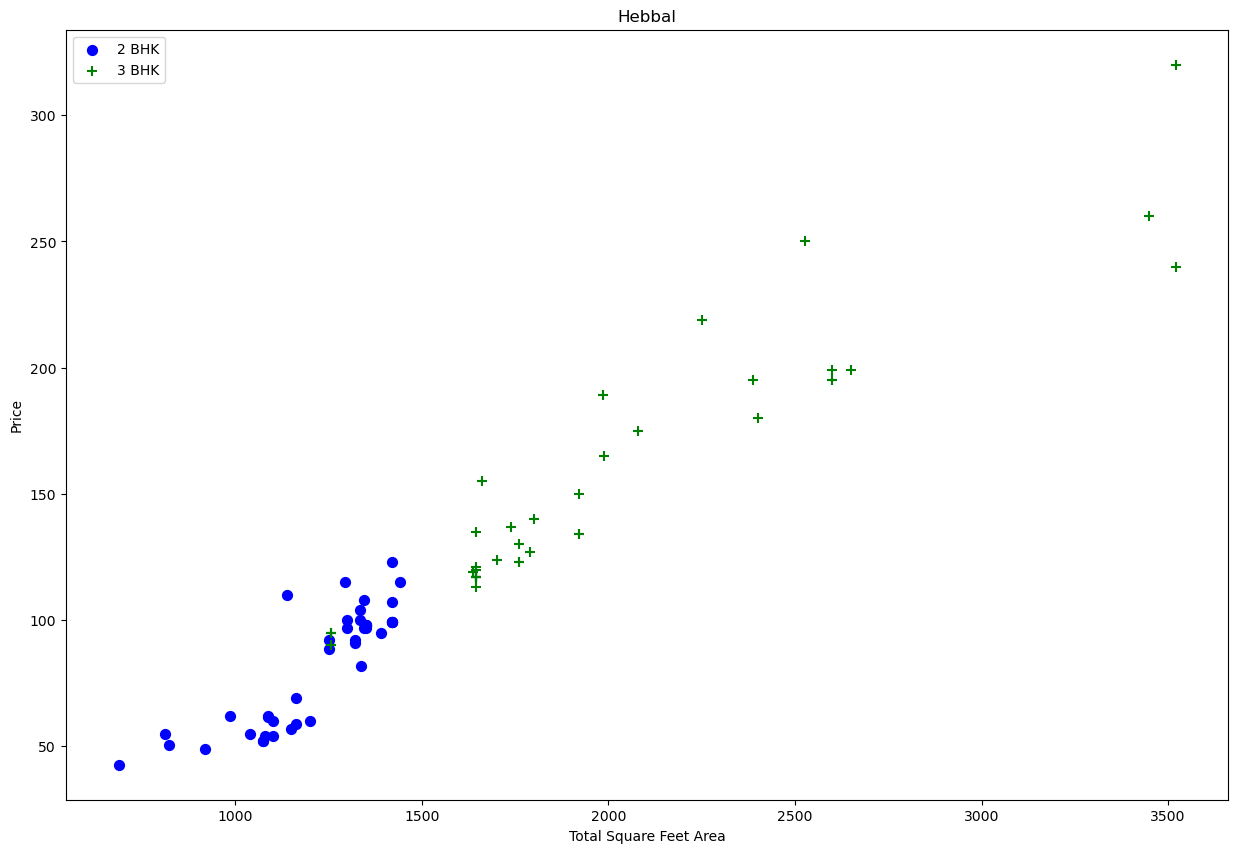

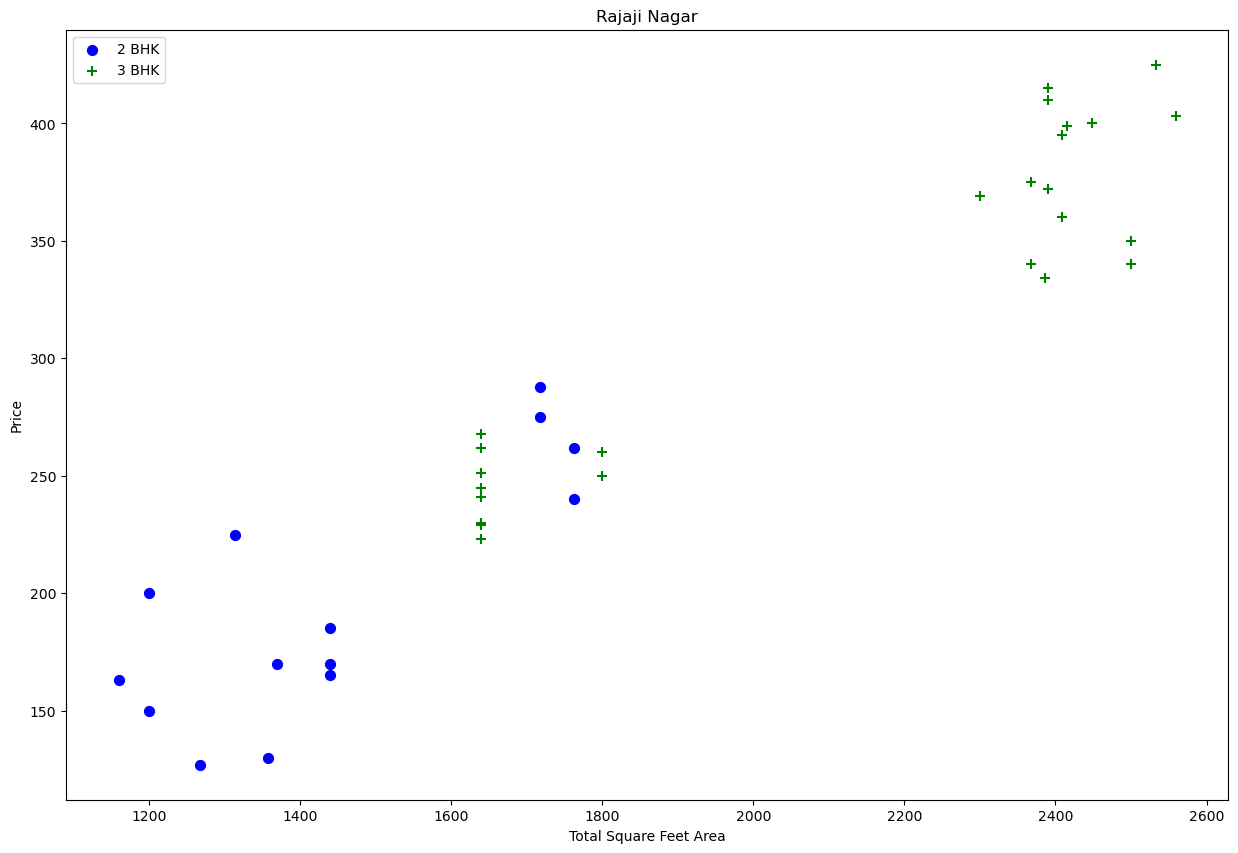

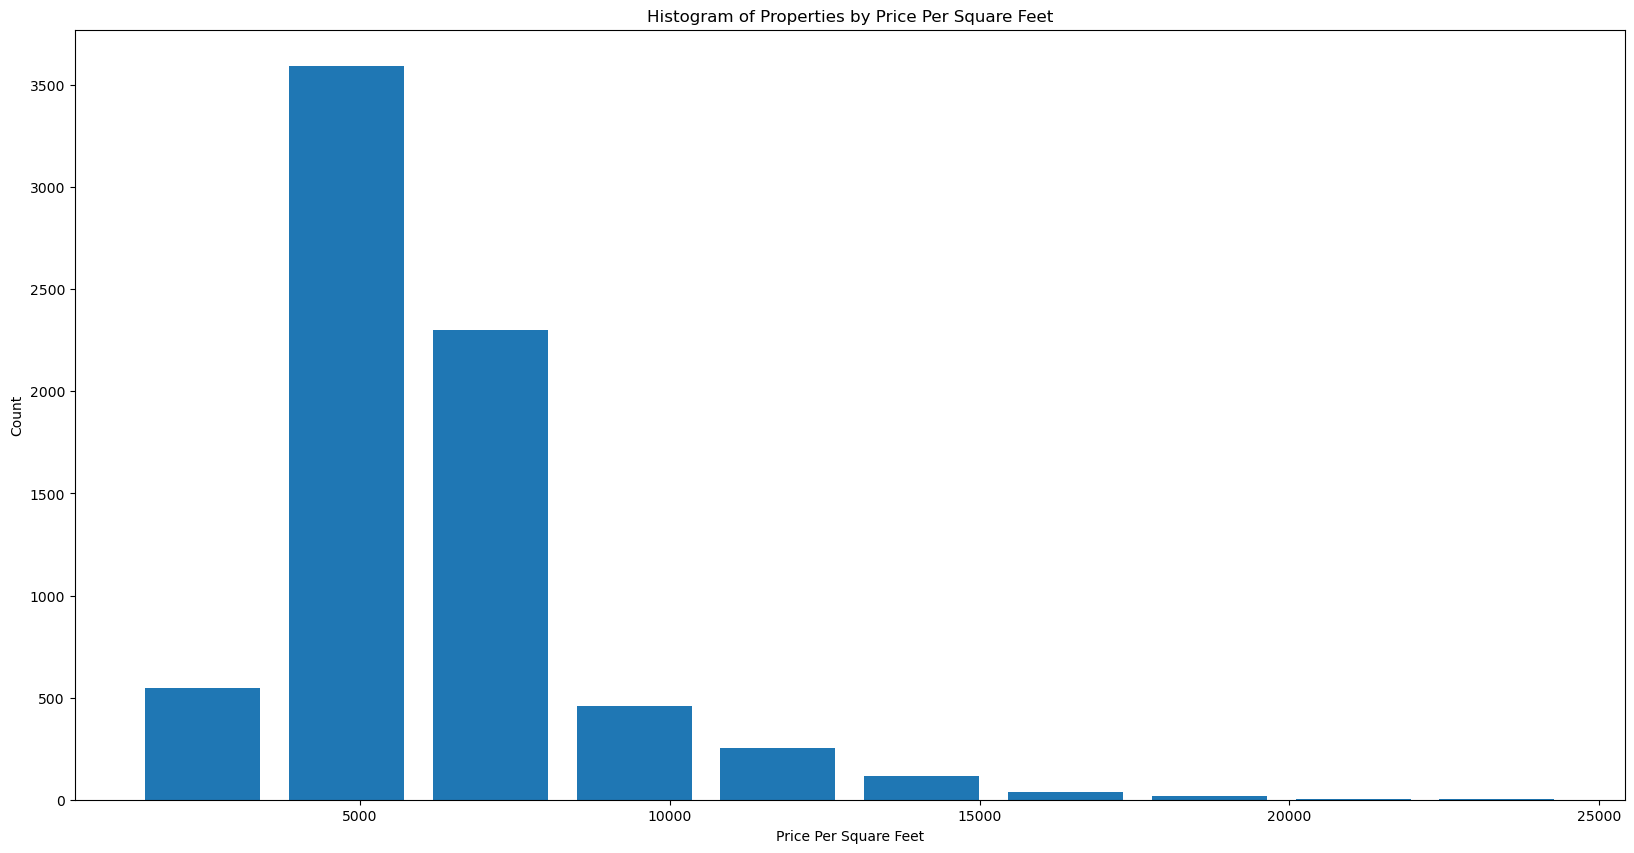

[ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 16. 13.]
            location    size  total_sqft  bath  price   bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0  10.0     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0  10.0     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0  16.0     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0  11.0     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0  13.0     5069.124424


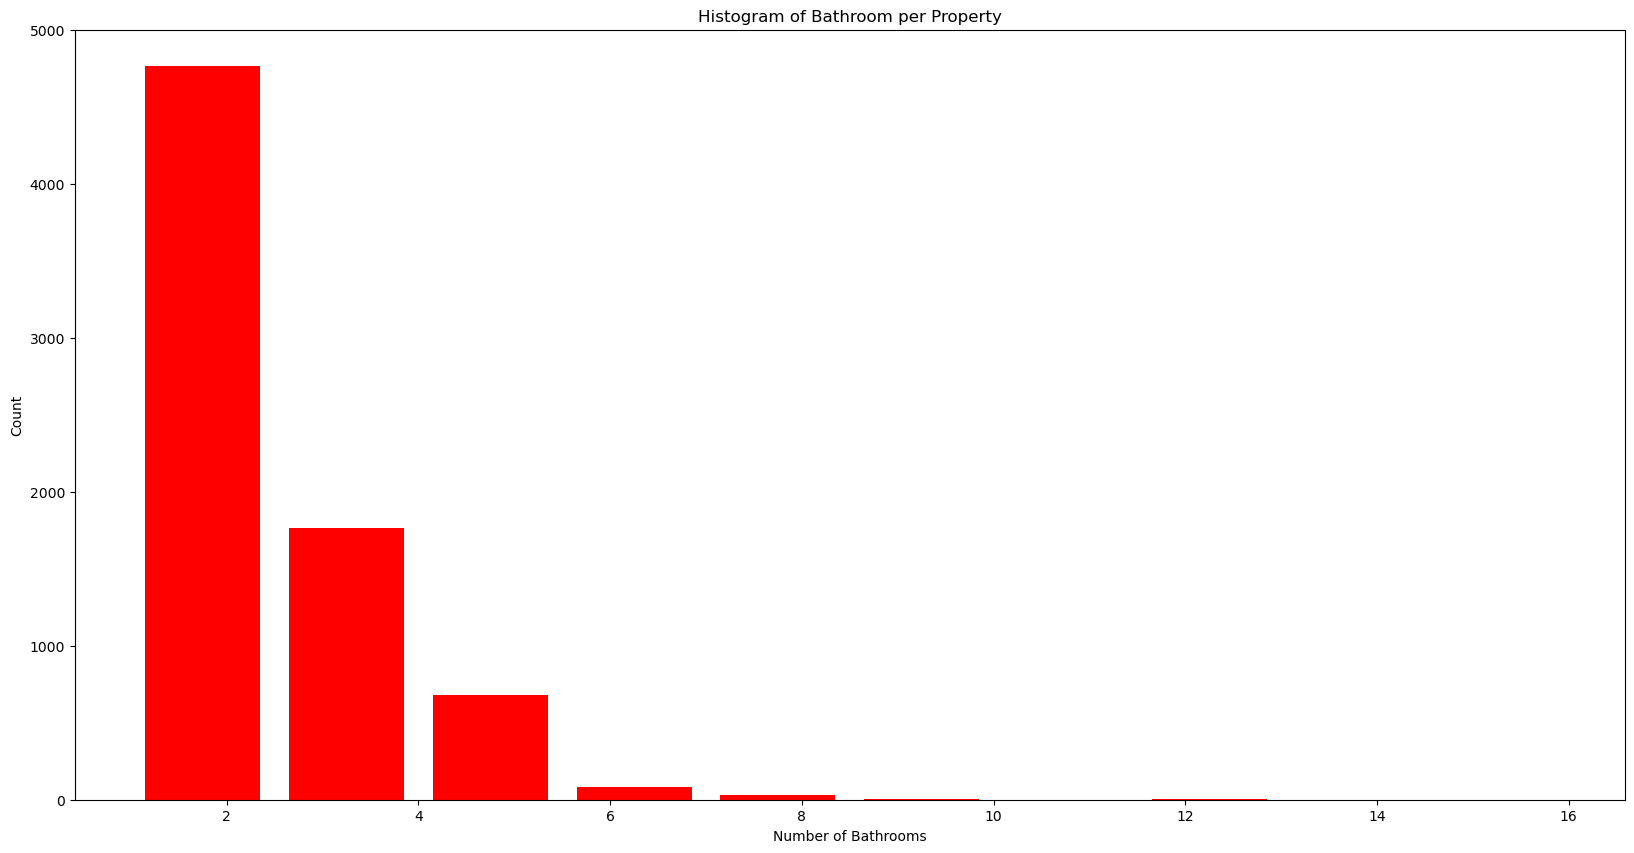

           location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0  4.0     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0  4.0     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0  3.0     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0  6.0     8819.897689
(7251, 7)
              location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0  4.0
1  1st Block Jayanagar      1630.0   3.0  194.0  3.0
2  1st Block Jayanagar      1875.0   2.0  235.0  3.0
3  1st Block Jayanagar      1200.0   2.0  130.0  3.0
4  1st Block Jayanagar      1235.0   2.0  148.0  2.0
   1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                 True               False                      False   
1                 True               False                      False   
2                 True               False                     

C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sandr\anaconda3\Lib\site-packages\s

               model  best_score  \
0  linear_regression    0.819001   
1              lasso    0.687446   
2      decision_tree    0.711143   

                                         best_params  
0             {'fit_intercept': False, 'n_jobs': -1}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}  
85.8390125683735
87.76501220604206
181.59488997131325


C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sandr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 12 05:56:10 2020

@author: Vishwas Basotra
"""

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# importing the dataset
dataset = pd.read_csv('Bengaluru_House_Data.csv')
print(dataset.head(10))
print(dataset.shape)

# Data preprocessing
## getting the count of area type in the dataset
print(dataset.groupby('area_type')['area_type'].agg('count'))

## droping unnecessary columns
dataset.drop(['area_type','society','availability','balcony'], axis='columns', inplace=True)
print(dataset.shape)

## data cleaning

print(dataset.isnull().sum())
dataset.dropna(inplace=True)
print(dataset.shape)

### data engineering
print(dataset['size'].unique())
dataset['bhk'] = dataset['size'].apply(lambda x: float(x.split(' ')[0]))

### exploring 'total_sqft' column
print(dataset['total_sqft'].unique())

#### defining a function to check whether the value is float or not
def is_float(x):
    try:
        float(x)
    except :
        return False
    return True

print(dataset[~dataset['total_sqft'].apply(is_float)].head(10))

#### defining a function to convert the range of column values to a single value
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
#### testing the function
print(convert_sqft_to_num('290'))
print(convert_sqft_to_num('2100 - 2850'))
print(convert_sqft_to_num('4.46Sq. Meter'))

#### applying this function to the dataset
dataset['total_sqft'] = dataset['total_sqft'].apply(convert_sqft_to_num)
print(dataset['total_sqft'].head(10))
print(dataset.loc[30])

## feature engineering

print(dataset.head(10))

### creating new colomn 'price_per_sqft' as we know
### in real estate market, price per sqft matters alot. 
dataset['price_per_sqft'] = dataset['price']*100000/dataset['total_sqft']
print(dataset['price_per_sqft'])

### exploring 'location' column
print(len(dataset['location'].unique()))

dataset['location'] = dataset['location'].apply(lambda x: x.strip())

location_stats = dataset.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats[0:10])

#### creating 'location_stats' to get the location with total count or occurance 
#### occurance, and 'location_stats_less_than_10' to get the location with <= 10 
#### occurance
print(len(location_stats[location_stats <= 10]))
location_stats_less_than_10 = location_stats[location_stats <= 10]
print(location_stats_less_than_10)

#### redefining the 'location' column as 'other' value where location count
#### is <= 10
dataset['location'] = dataset['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print(dataset['location'].head(10))
print(len(dataset['location'].unique()))

## Outlier detection and removal

### checking that 'total_sqft'/'bhk', if it's very less than there is some
### anomaly and we have to remove these outliers
print(dataset[dataset['total_sqft'] / dataset['bhk'] < 300].sort_values(by='total_sqft').head(10))
print(dataset.shape)

dataset = dataset[~(dataset['total_sqft'] / dataset['bhk'] < 300)]
print(dataset.shape)

### checking columns where 'price_per_sqft' is very low
### where it should not be that low, so it's an anomaly and 
### we have to remove those rows
print(dataset['price_per_sqft'].describe())

### function to remove these extreme cases of very high or low values
### of 'price_per_sqft' based on std()
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (mean - std)) & (subdf['price_per_sqft'] <= (mean + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

dataset = remove_pps_outliers(dataset)
print(dataset.shape)

### plotting graoh where we can visualize that properties with same location
### and the price of 3 bhk properties with higher 'total_sqft' is less than 
### 2 bhk properties with lower 'total_sqft'
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], 
                bhk2['price'], 
                color='blue', 
                label='2 BHK', 
                s=50
                )
    plt.scatter(bhk3['total_sqft'], 
                bhk3['price'], 
                marker='+',
                color='green', 
                label='3 BHK', 
                s=50
                )
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(dataset,"Hebbal")
plot_scatter_chart(dataset,"Rajaji Nagar")

### defining a funcion where we can get the rows where 'bhk' & 'location'
### is same but the property with less 'bhk' have more price than the property
### which have more 'bhk'. So, it's also an anomalu and we have to remove these 
### properties
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                    'mean': np.mean(bhk_df['price_per_sqft']),
                    'std': np.std(bhk_df['price_per_sqft']),
                    'count': bhk_df.shape[0]
                }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
        
dataset = remove_bhk_outliers(dataset)
print(dataset.shape)
            
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], 
                bhk2['price'], 
                color='blue', 
                label='2 BHK', 
                s=50
                )
    plt.scatter(bhk3['total_sqft'], 
                bhk3['price'], 
                marker='+',
                color='green', 
                label='3 BHK', 
                s=50
                )
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(dataset,"Hebbal")
plot_scatter_chart(dataset,"Rajaji Nagar")

### histogram for properties per sqaure feet area
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(dataset['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.title('Histogram of Properties by Price Per Square Feet')
plt.show()

### exploring bathroom feature
print(dataset['bath'].unique())

#### having 10 bedrooms and bathroom > 10 is unusual
#### so, we will remove these anomalies
print(dataset[dataset['bath'] > 10])

#### plotting histogram of bathroom 
plt.hist(dataset['bath'], rwidth=0.8, color='red')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Histogram of Bathroom per Property')
plt.show()

print(dataset[dataset['bath'] > dataset['bhk'] + 2])
dataset = dataset[dataset['bath'] < dataset['bhk'] + 2]
print(dataset.shape)

### after removing outliers, dropping unwanted features
dataset.drop(['size','price_per_sqft'], axis='columns', inplace=True)
print(dataset.head())

## one hot encoding the 'location' column
dummies = pd.get_dummies(dataset['location'])
print(dummies.head())

dataset = pd.concat([dataset,dummies.drop('other', axis='columns')], axis='columns')
dataset.drop('location', axis=1, inplace=True)
print(dataset.head())
print(dataset.shape)

## distributing independent features in 'X' and dependent feature in 'y'
X = dataset.drop(['price'],axis= 'columns')
y = dataset['price']
print(X.shape)
print(y.shape)

## splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## training  the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.score(X_test,y_test))

## k-fold cross validation
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
cross_val_score(regressor,X,y,cv=cv)

## grid search, hyper parameter tuning
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearch(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'n_jobs': [-1, None]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, n_jobs=-1, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

model_scores = find_best_model_using_gridsearch(X, y)
print(model_scores)


### so after running grid search, linear regression model have the best score
### so i will use linear regression model on the whole dataset

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

## evaluating the model
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return regressor.predict([x])[0]

print(predict_price('1st Phase JP Nagar',1000,2,2))
print(predict_price('1st Phase JP Nagar',1000,3,3))
print(predict_price('Indira Nagar',1000,3,3))

# saving the model
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(regressor,f)

# exporting columns
import json
columns = {'data_columns': [col.lower() for col in X.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

















